# Сихнронизация среды разработки

Чтобы сихнронизировать версии библотек и получать единообразные результаты выполним ряд операций.

In [36]:
# проверить версию Python
import sys
print(sys.version)

3.11.6 | packaged by conda-forge | (main, Oct  3 2023, 10:40:35) [GCC 12.3.0]


In [34]:
# обновить установщик пакетов
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3
    Uninstalling pip-23.3:
      Successfully uninstalled pip-23.3


In [ ]:
# синхронизировать версии библиотек
!pip install -U -r requirements.txt

## Чтение данных

**Pandas** — одна из основных библиотек для работы с табличными данными в Python. Она предоставляет удобные структуры данных, такие как **DataFrame**, для эффективной работы с большими объемами данных.

**NumPy** — это библиотека для работы с многомерными массивами и матрицами, которая также полезна при проведении числовых операций.

Пример кода для импорта библиотек и загрузки датасета:

```python
import pandas as pd
import numpy as np

# Загрузка ранее созданного датасета
df = pd.read_excel('railway_freight_data.xlsx')

# Вывод первых 5 строк датасета
df.head()
```

### Пояснение:
1. **`pd.read_csv()`** — эта функция позволяет загружать данные из файла CSV в DataFrame.
2. **`df.head()`** — выводит первые 5 строк для того, чтобы убедиться, что данные загружены корректно. В скобках можно указать любое число строк, которые надо вывести.

### Описание датасета:
Датасет будет содержать информацию о перевозках грузов по железной дороге. В нем будут такие столбцы:
- `Train_ID`: уникальный идентификатор поезда
- `Date`: дата отправления поезда
- `Departure_City`: город отправления
- `Arrival_City`: город прибытия
- `Cargo_Type`: тип груза (уголь, зерно, металл, контейнеры)
- `Weight_Tons`: вес груза в тоннах
- `Distance_KM`: расстояние перевозки в километрах
- `Cost_USD`: стоимость перевозки в долларах США
- `Delay_Hours`: задержка в часах при доставке

,Train_ID,Date,Departure_City,Arrival_City,Cargo_Type,Weight_Tons,Distance_KM,Cost_USD,Delay_Hours
0,1,2023-04-13,Kazan,Saint Petersburg,Metal,7473.28,1599.65,597731.62,0.19
1,2,2023-12-15,Kazan,Ekaterinburg,Metal,7744.67,2804.20,1085880.18,0.00
2,3,2023-09-28,Moscow,Vladivostok,Grain,9327.95,3968.11,1850716.58,0.00
3,4,2023-04-17,Ekaterinburg,Novosibirsk,Metal,790.22,2139.47,84532.60,6.25
4,5,2023-03-13,Saint Petersburg,Kazan,Metal,8784.46,923.78,405745.42,0.00


Часто удобнее и более полезно посмотреть некоторое количество случайных строк датасета.

```python
df.sample(3, random_state=42)
```

Где мы можем указать количество случайных строк, которые можно отобразить. Параметр `random_state` фиксирует набор случайных чисел, для воспроизводимости результата.

## Разведывательный анализ данных (EDA)

### Введение в EDA
**Разведывательный анализ данных (Exploratory Data Analysis, EDA)** — это важный этап подготовки данных для последующего моделирования и принятия решений. EDA помогает лучше понять структуру данных, выявить скрытые закономерности, аномалии, выбросы и подготовить данные для дальнейшего анализа. В этом блоке мы рассмотрим основные принципы EDA и ключевые методы.


### Цели данного блока

1. Понять структуру данных
2. Очистить от выбросов и аномалий
3. Выявить закономерности и зависимости в данных
4. Сформировать первичные гипотезы
5. Сформировать новые признаки (фичи)

**Например:** нам поставлена задача выявить причины задержек грузов во время доставки.

---

### Основные понятия разведывательного анализа данных

EDA предполагает следующие ключевые шаги:

1. **Знакомство с данными**:
   - Какую информацию представляют данные?
   - Какие переменные (столбцы) присутствуют в наборе данных?
   - Какого типа эти переменные (числовые, категориальные и т.д.)?

2. **Описательная статистика**:
   - Какова структура данных?
   - Что можно сказать о распределении переменных?
   - Какие ключевые статистические показатели (среднее, медиана, мода, стандартное отклонение и т.д.) можно вычислить?

3. **Оценка качества данных**:
   - Содержат ли данные пропуски?
   - Есть ли в данных выбросы (аномалии)?
   - Корректны ли типы данных для каждого столбца?

4. **Визуализация данных**:
   - Как визуализировать данные для лучшего понимания их структуры?
   - Какие графики подходят для каждого типа данных (гистограммы, диаграммы рассеяния, коробчатые диаграммы и т.д.)?

Теперь рассмотрим каждый из этих шагов на конкретных примерах с кодом.

---

### Применение статистических методов для описания данных

#### Шаг 1: Знакомство с данными

Первым шагом всегда является изучение структуры данных. В этом случае полезно узнать, какие столбцы (переменные) есть в наборе данных, каков их тип и сколько строк (наблюдений) представлено в датасете.

##### Пример:
Мы используем ранее загруженный датасет о грузоперевозках по железной дороге.

### Пояснение:

**`df.info()`** — предоставляет обзор структуры данных:
   - Количество строк и столбцов.
   - Тип данных каждого столбца.
   - Количество ненулевых значений в каждом столбце (это полезно для выявления пропусков).

Информацию о структуре таблицы обязательно надо отправить в ИИ перед запросом, чтобы названия столбцов в сгенерированном коде соответствовали реалиям.

### Шаг 2: Описательная статистика

Для количественных переменных крайне полезно получить сводку статистических показателей. Это включает в себя среднее значение, медиану, минимальное и максимальное значения, а также распределение значений через квартильные интервалы.

##### Пример получения описательной статистики:

```python
# Описательная статистика для количественных переменных
df.describe()
```

### Пояснение:
1. **`describe()`** выводит стандартные статистические параметры для всех числовых переменных в наборе данных:
   - **count**: количество ненулевых значений.
   - **mean**: среднее значение переменной.
   - **std**: стандартное отклонение.
   - **min**: минимальное значение.
   - **25%, 50%, 75%**: квартильные значения (25-й, 50-й, 75-й процентили), которые показывают распределение значений.
   - **max**: максимальное значение.

##### Интерпретация результатов:

Допустим, в столбце `Weight_Tons` среднее значение составляет 4500 тонн, минимальное значение — 500 тонн, а максимальное — 9500 тонн. Это дает представление о том, что большинство грузов варьируются по весу между 500 и 9500 тонн, а средний груз весит около 4500 тонн. Стандартное отклонение поможет оценить, насколько широко варьируются значения относительно среднего.

,Train_ID,Weight_Tons,Distance_KM,Cost_USD,Delay_Hours
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,500.500000,5442.265230,2479.636640,6.723286e+05,3.174300
std,288.819436,2704.616974,1424.806624,5.394178e+05,3.590674
min,1.000000,504.210000,100.910000,3.283290e+03,0.000000
25%,250.750000,3169.490000,1238.855000,2.256620e+05,0.000000
50%,500.500000,5639.995000,2429.065000,5.427089e+05,2.005000
75%,750.250000,7745.885000,3726.800000,1.016969e+06,5.362500
max,1000.000000,9995.670000,4988.350000,2.493095e+06,20.290000


### Шаг 3: Визуализация распределения данных

Визуализация данных помогает наглядно увидеть распределение переменных. Например, для числовых данных гистограмма (histogram) позволяет оценить частотное распределение значений.

##### Пример построения гистограммы:

```python
import matplotlib.pyplot as plt
# Построение гистограммы для столбца 'Weight_Tons'
plt.figure(figsize=(8, 5))
plt.hist(df['Weight_Tons'], bins=20, color='blue', edgecolor='black')
plt.title('Распределение веса грузов')
plt.xlabel('Вес, тонн')
plt.ylabel('Частота')
plt.show()
```

### Пояснение:
- **`hist()`** — строит гистограмму, которая показывает, сколько раз данные попадают в определенные интервалы (bins).
- Гистограмма помогает оценить, как распределены данные (нормально ли, есть ли перекосы и т.д.).

##### Интерпретация:
Допустим, гистограмма показала, что большинство грузов весит между 3000 и 7000 тонн, но есть несколько грузов весом более 9000 тонн. Это может указывать на возможные выбросы или специфику структуры данных.

Для изменения цвета графика по палитре RGB в Matplotlib вы можете передать значение цвета в формате RGB или HEX. В Matplotlib для RGB используется нормализованная палитра, где значения компонентов цвета (R, G, B) находятся в диапазоне от 0 до 1.

Вот пример, как изменить цвет гистограммы на определённый цвет с использованием RGB палитры:

```python
import matplotlib.pyplot as plt

# Цвет в формате RGB (например, светло-синий: RGB = 173, 216, 230)
rgb_color = (226/255, 25/255, 25/255)  # Нормализуем до значений от 0 до 1

# Построение гистограммы с указанием цвета
plt.figure(figsize=(8, 5))
plt.hist(df['Weight_Tons'], bins=20, color=rgb_color, edgecolor='black')
plt.title('Распределение веса грузов')
plt.xlabel('Вес, тонн')
plt.ylabel('Частота')
plt.show()
```

### Пояснение:
- **`color=rgb_color`** — передает нормализованные значения RGB в диапазоне от 0 до 1. Например, цвет RGB = (173, 216, 230) преобразован в (0.68, 0.85, 0.9).
- **`edgecolor='black'`** — цвет границ столбцов.

Вы можете заменить значения `rgb_color` на любые другие, чтобы получить нужный цвет.

Для наглядности можно восстановить распределение и также отобразить его на графике.

```python
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Цвет в формате RGB (например, светло-синий: RGB = 173, 216, 230)
rgb_color = (226/255, 25/255, 25/255)  # Нормализуем до значений от 0 до 1

# Вычисление KDE
kde = gaussian_kde(df['Weight_Tons'])

# Генерация точек для построения KDE
x = np.linspace(df['Weight_Tons'].min(), df['Weight_Tons'].max(), 100)

# Построение гистограммы с указанием цвета
plt.figure(figsize=(8, 5))
plt.hist(df['Weight_Tons'], bins=20, color=rgb_color, edgecolor='black', density=True, alpha=0.5)

# Построение KDE
plt.plot(x, kde(x), 'r--', label='KDE')

plt.title('Распределение веса грузов')
plt.xlabel('Вес, тонн')
plt.ylabel('Плотность')
plt.legend()
plt.show()
```

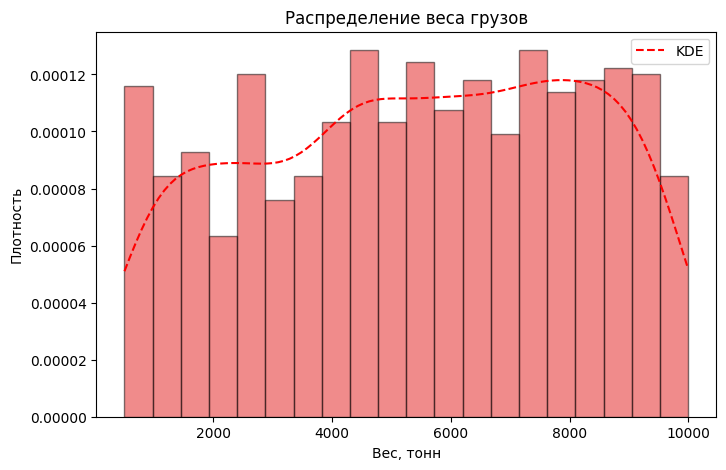

Можно построить гистограммы сразу по всем количественным признакам. 
    
```python
df.hist(figsize=(17,8));
```

Где `figsize=(17,8)` - размер области построения диаграммы.

## Парный график

**Pairplot (Парный график)** – это удобный инструмент для визуализации взаимосвязей между несколькими числовыми переменными в наборе данных. Он создает сетку диаграмм рассеяния (scatter plots) для каждой пары переменных, а также отображает распределение данных в виде гистограмм на диагонали. Это помогает аналитикам быстро обнаружить закономерности, корреляции и потенциальные аномалии в данных.

### **Ключевые параметры для построения pairplot:**

1. **data:** Набор данных, который нужно визуализировать. Обычно используется DataFrame из библиотеки Pandas.
   ```python
   import seaborn as sns
   sns.pairplot(data=df)
   ```

2. **hue:** Переменная, по которой можно окрасить точки в графиках. Это помогает различать группы данных по определенному признаку.
   ```python
   sns.pairplot(data=df, hue='Категория')
   ```
   *Пример:* Если у вас есть столбец "Тип груза", вы можете задать его как параметр `hue`, чтобы визуально отделить разные категории груза.

3. **palette:** Палитра цветов, используемая для окрашивания точек. Вы можете указать готовую палитру или создать собственную.
   ```python
   sns.pairplot(data=df, hue='Категория', palette='coolwarm')
   ```

4. **diag_kind:** Тип графика на диагонали, который отображает распределение каждой переменной. Возможные значения: `'auto'`, `'hist'` (гистограмма) или `'kde'` (ядерная оценка плотности).
   ```python
   sns.pairplot(data=df, diag_kind='kde')
   ```

5. **markers:** Маркеры, используемые для обозначения точек на графиках. Вы можете указать различные маркеры для разных категорий данных.
   ```python
   sns.pairplot(data=df, hue='Категория', markers=['o', 's', 'D'])
   ```

### **Когда использовать pairplot:**
- Когда нужно быстро исследовать взаимосвязи между несколькими переменными.
- Для выявления корреляций между переменными.
- Для обнаружения выбросов и аномалий в данных.
- При изучении распределений данных по категориям.

**Пример использования:**
```python
import seaborn as sns

# Выбор количественных столбцов
quant_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Построение pairplot для количественных столбцов с KDE и подсветкой точек по виду груза
sns.pairplot(df, kind='scatter', hue='Cargo_Type')
# Сохранение графика в формате JPG
plt.savefig('pairplot.jpg')
```

**Итог:** Парный график – отличный способ для начинающих аналитиков быстро получить представление о наборе данных и выявить ключевые взаимосвязи между переменными.

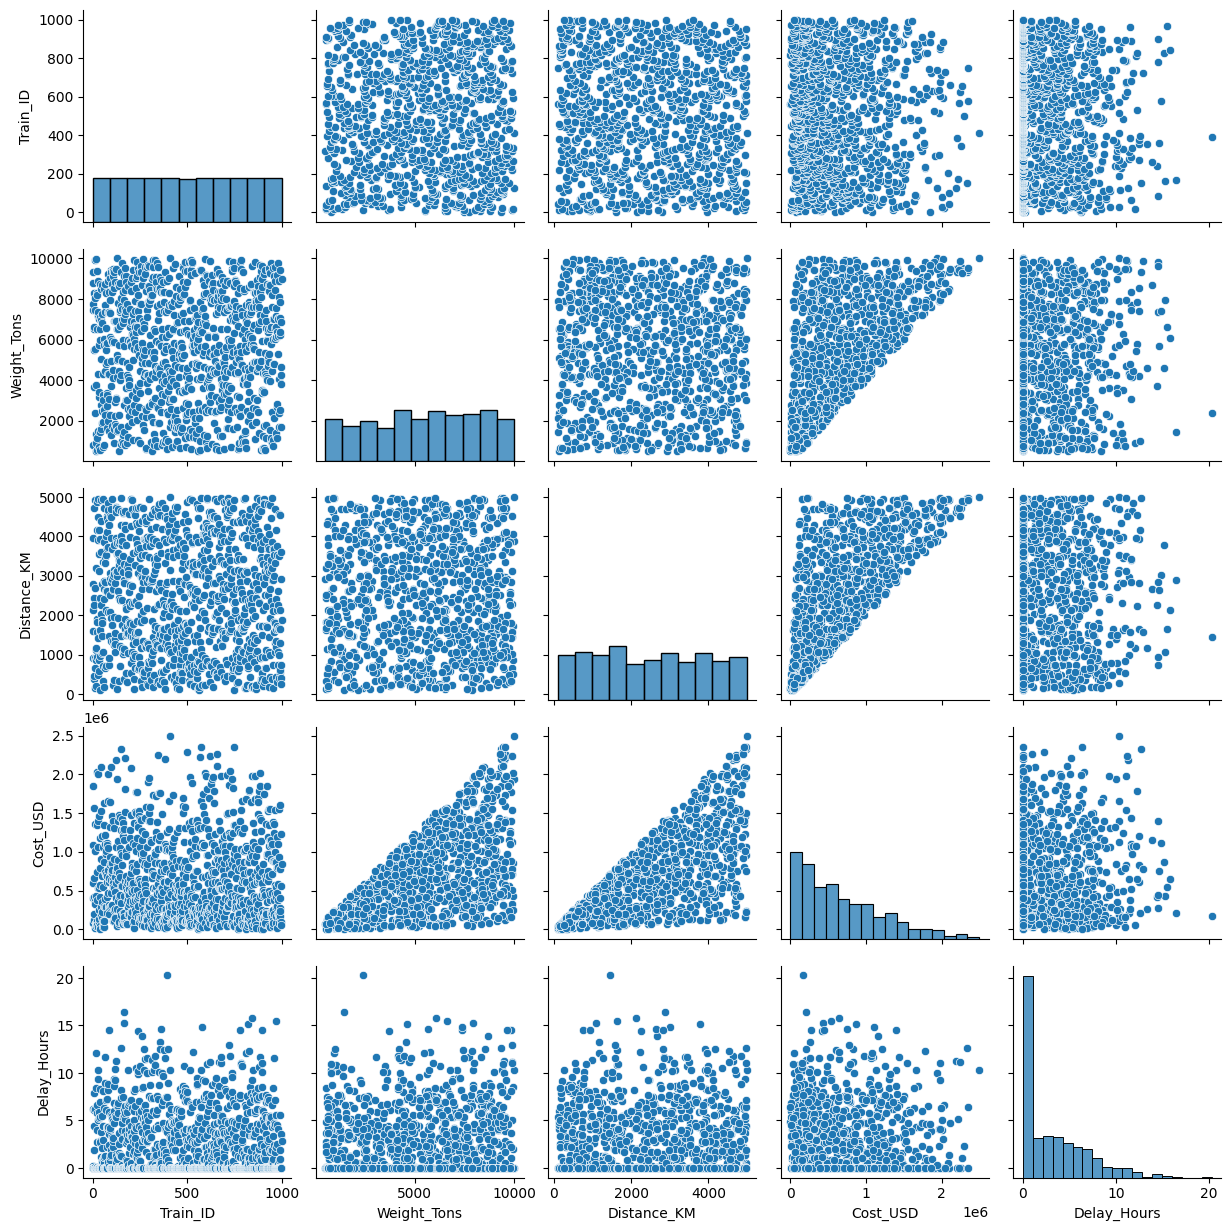

## Примеры и типы графиков

Примеры графиков можно увидеть в галерее в документации к библиотеке matplotlib https://matplotlib.org/stable/gallery/

А также очень полезна библиотека seaborn, примеры графиков https://seaborn.pydata.org/examples/index.html

**Введение в визуализацию данных: когда и какие графики использовать**

Визуализация данных – важный инструмент для аналитиков, который помогает понять сложные наборы данных и сделать выводы, необходимые для принятия решений. Вот основные типы графиков и ситуации, когда они лучше всего подходят:

##### 1. **Гистограммы (Histograms)**
- **Когда использовать:** Чтобы показать распределение одной числовой переменной.
- **Пример:** Анализ частоты распределения доходов среди группы людей.
- **Описание:** Гистограммы позволяют увидеть, как значения распределены, включая пики, выбросы и симметричность данных.

##### 2. **Диаграммы рассеяния (Scatter Plots)**
- **Когда использовать:** Чтобы проанализировать взаимосвязь между двумя числовыми переменными.
- **Пример:** Исследование зависимости между возрастом и доходом.
- **Описание:** Эти графики помогают определить корреляцию между переменными и выявить аномалии.

##### 3. **Парные графики (Pairplots)**
- **Когда использовать:** Для исследования взаимосвязей между несколькими числовыми переменными.
- **Пример:** Изучение корреляций в финансовых данных с использованием нескольких метрик.
- **Описание:** Сетевые диаграммы рассеяния для всех пар переменных с распределениями на диагонали.

##### 4. **Ящиковые диаграммы (Box Plots)**
- **Когда использовать:** Чтобы изучить распределение и выявить выбросы в данных.
- **Пример:** Сравнение доходов по разным возрастным группам.
- **Описание:** Ящиковые диаграммы показывают медиану, квартили и выбросы в данных, что помогает лучше понять их вариативность.

##### 5. **Столбчатые диаграммы (Bar Charts)**
- **Когда использовать:** Чтобы сравнить числовые значения для различных категорий.
- **Пример:** Анализ продаж по регионам или выручки по разным продуктам.
- **Описание:** Столбчатые диаграммы отлично подходят для представления категориальных данных и наглядного сравнения величин.

##### 6. **Круговые диаграммы (Pie Charts)**
- **Когда использовать:** Чтобы показать процентное соотношение категорий в общей массе.
- **Пример:** Доля продаж по разным продуктовым категориям.
- **Описание:** Круговые диаграммы подходят для случаев, когда нужно акцентировать внимание на долях, но их лучше избегать при большом количестве категорий.

##### 7. **Графики линий (Line Plots)**
- **Когда использовать:** Чтобы показать изменения числовых значений во времени.
- **Пример:** Тренд продаж за последние 12 месяцев.
- **Описание:** Линейные графики удобны для отслеживания временных рядов и выявления трендов и сезонных колебаний.

##### 8. **Тепловые карты (Heatmaps)**
- **Когда использовать:** Чтобы показать интенсивность или частоту значений в матрице.
- **Пример:** Анализ корреляции между несколькими числовыми переменными.
- **Описание:** Тепловые карты помогают быстро понять, какие переменные связаны друг с другом и с какой силой.

##### **Советы по выбору графиков:**
- **Для сравнения категорий:** Используйте столбчатые диаграммы или круговые диаграммы.
- **Для исследования взаимосвязей:** Диаграммы рассеяния и парные графики.
- **Для анализа распределения:** Гистограммы и ящиковые диаграммы.
- **Для анализа временных рядов:** Линейные графики.
- **Для визуализации корреляции:** Тепловые карты и парные графики.

Правильный выбор графика помогает быстрее понять данные и донести ключевые инсайты до вашей аудитории.

Также ИИ поможет вам подобрать оптимальный тип графика и напишет код для его реализации.

Например под построения диаграммы рассеяния:

```python
# Построение диаграммы рассеяния для веса грузов и стоимости перевозки
df.plot(kind='scatter', x='Weight_Tons', y='Cost_USD', color='red', figsize=(8, 5))
```

## **Введение в корреляцию: что это такое и как её применять**

Корреляция – это статистическая мера, которая показывает, насколько сильно и в каком направлении две переменные связаны между собой. Она помогает аналитикам понять, как изменение одной переменной может быть связано с изменением другой.

##### **Простыми словами:**
Корреляция показывает, есть ли взаимосвязь между переменными, и, если да, то насколько она сильная. Например, если мы видим, что рост температуры связан с увеличением продаж мороженого, можно сказать, что между этими переменными есть положительная корреляция.

##### **Типы корреляции:**
1. **Положительная корреляция:** Когда одна переменная увеличивается, другая тоже увеличивается.
   - *Пример:* Чем больше времени вы тратите на изучение предмета, тем выше ваши оценки (в большинстве случаев).
2. **Отрицательная корреляция:** Когда одна переменная увеличивается, другая уменьшается.
   - *Пример:* Чем больше времени вы проводите в пробках, тем меньше времени у вас остается для отдыха.
3. **Отсутствие корреляции:** Когда изменения одной переменной никак не связаны с изменениями другой.
   - *Пример:* Ваш рост и ваши любимые фильмы, скорее всего, не связаны.

##### **Коэффициент корреляции (r):**
- Коэффициент корреляции измеряется по шкале от -1 до 1.
  - **r = 1:** Полная положительная корреляция.
  - **r = -1:** Полная отрицательная корреляция.
  - **r = 0:** Отсутствие линейной корреляции.
- Чем ближе значение r к 1 или -1, тем сильнее взаимосвязь между переменными. Значения около 0 означают слабую или отсутствующую взаимосвязь.

##### **Когда применяется корреляция:**
- **Анализ взаимосвязей:** Корреляция используется, чтобы понять, связаны ли две переменные между собой. Например, чтобы узнать, влияет ли уровень дохода на количество покупок.
- **Предварительный анализ данных:** Часто корреляцию рассчитывают в начале анализа, чтобы выявить потенциальные связи между переменными.
- **Прогнозирование:** Если обнаружена сильная корреляция, это может помочь в прогнозировании. Например, если известно, что температура и продажи мороженого связаны, можно предсказать, что при росте температуры продажи также возрастут.

##### **Ограничения корреляции:**
1. **Не означает причинно-следственную связь:** Корреляция указывает на связь, но не говорит, что одна переменная вызывает изменение другой.
   - *Пример:* Рост продаж мороженого и увеличение числа утоплений могут быть положительно коррелированы, но это не значит, что мороженое вызывает утопления. Здесь в игру вступает третья переменная – летняя жара.
2. **Уязвимость к выбросам:** Несколько экстремальных значений в данных могут сильно исказить коэффициент корреляции.
3. **Линейные связи:** Корреляция показывает только линейные зависимости. Если связь между переменными нелинейная, коэффициент корреляции может быть обманчиво низким.
   - *Пример:* Если связь между переменными напоминает параболу, корреляция может быть близка к нулю, несмотря на очевидную зависимость.
4. **Ограниченность масштаба:** Корреляция не учитывает направление и силу изменений за пределами диапазона данных.

Корреляция – полезный инструмент для изучения взаимосвязей между переменными, но её нужно использовать с осторожностью. Важно помнить, что наличие связи не означает причинно-следственную зависимость и что всегда стоит анализировать данные в контексте, а не полагаться только на цифры.

Пример кода:

```python
# Выбор количественных столбцов
quant_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Вычисление корреляции
df[quant_cols].corr()
```

## **Введение в тепловые карты: что это и зачем они нужны**

**Тепловая карта (Heatmap)** – это визуальный способ отображения данных, где отдельные значения представлены в виде цветов. Тепловые карты помогают быстро понять распределение данных, интенсивность или взаимосвязи между несколькими переменными, используя цветовые градиенты.

##### **Когда используются тепловые карты:**
1. **Анализ корреляций:** Тепловые карты часто применяются для визуализации коэффициентов корреляции между переменными. Это позволяет аналитикам сразу увидеть, какие переменные тесно связаны друг с другом.
2. **Показ распределения:** Тепловые карты удобны для демонстрации плотности или интенсивности данных в матрицах. Например, распределение количества посещений на разных участках веб-страницы.
3. **Визуализация больших объемов данных:** Когда у вас есть большой объем числовых данных, тепловая карта помогает быстро понять ключевые паттерны и аномалии.

##### **Как это работает:**
- В тепловых картах числовые значения преобразуются в цвета. Обычно используется градиент от холодных цветов (например, синий) для низких значений до теплых цветов (например, красный) для высоких значений.
- Например, в корреляционной тепловой карте:
  - **Синий цвет** может обозначать сильную отрицательную корреляцию (значения около -1).
  - **Красный цвет** – сильную положительную корреляцию (значения около 1).
  - **Белый или нейтральный цвет** – отсутствие корреляции (значения около 0).

##### **Пример использования:**
Если у вас есть набор данных с несколькими числовыми переменными, вы можете создать тепловую карту, чтобы быстро определить, как эти переменные связаны друг с другом. Например, в анализе продаж можно увидеть, какие факторы (например, погода, день недели или рекламные кампании) наиболее сильно влияют на объем продаж.

##### **Преимущества тепловых карт:**
1. **Визуальная интерпретация:** Легко заметить связи, которые трудно увидеть в таблицах с числами.
2. **Выявление паттернов:** Помогают быстро определить основные тенденции, закономерности и аномалии.
3. **Поддержка анализа больших данных:** Полезны, когда необходимо проанализировать большое количество взаимосвязей между переменными.

##### **Ограничения тепловых карт:**
1. **Сложность интерпретации:** При большом количестве переменных или значений тепловая карта может стать трудной для понимания, особенно если используются сложные цветовые градиенты.
2. **Проблемы с восприятием:** Цветовое восприятие может быть субъективным, и не все люди одинаково воспринимают цветовые оттенки (например, люди с дальтонизмом).
3. **Только числовые данные:** Тепловые карты лучше всего подходят для отображения числовых данных и не так эффективны для анализа категориальных данных.

##### **Пример создания тепловой карты с использованием Python:**
```python
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Предположим, что ваш DataFrame называется df и уже загружен

# Выбор количественных столбцов
quant_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Вычисление корреляции
corr_matrix = df[quant_cols].corr()

# Построение тепловой карты корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляции количественных столбцов')
plt.show()
```
**Описание:** В этом примере мы использовали библиотеку Seaborn для создания тепловой карты корреляционной матрицы. Параметр `annot=True` добавляет числовые значения на карту, а `cmap='coolwarm'` определяет цветовую схему.

Тепловые карты – это мощный инструмент для визуализации данных, который помогает аналитикам быстро увидеть основные взаимосвязи и аномалии. Однако их нужно использовать с осторожностью, чтобы избежать сложностей в интерпретации при большом количестве переменных.

## Частота категориальных признаков в DataFrame: `value_counts()` и `unique()`

Когда вы работаете с данными в формате DataFrame, часто возникает необходимость проанализировать категориальные признаки (столбцы, которые содержат дискретные значения, например, категории, названия, статусы). Для этого в библиотеке `pandas` существуют две полезные функции — **`value_counts()`** и **`unique()`**.

#### Функция `value_counts()`

Функция `value_counts()` используется для подсчета частоты значений в столбце DataFrame. Она возвращает количество каждого уникального значения в виде отсортированной таблицы, что позволяет легко оценить распределение категориальных данных.

##### Пример использования `value_counts()`:
```python
# Используем value_counts для подсчета частоты значений в столбце Department
cargo_counts = df['Cargo_Type'].value_counts()
print(cargo_counts)
```

#### Параметры `value_counts()`:
- **`normalize=True`**: Если хотите получить относительные частоты (доли), а не абсолютные значения, добавьте параметр `normalize=True`.
- **`dropna=False`**: Чтобы включить в расчет отсутствующие значения (`NaN`), используйте `dropna=False`.

#### Функция `unique()`

Функция `unique()` возвращает массив всех уникальных значений в столбце DataFrame. Это полезно, когда нужно узнать, какие категории (или уникальные значения) присутствуют в данных.

##### Пример использования `unique()`:
```python
# Используем unique для получения уникальных значений в столбце Department
unique_cargo = df['Cargo_Type'].unique()
print(unique_cargo)
```

#### Заключение

- **`value_counts()`** полезен, когда нужно понять распределение категорий в данных.
- **`unique()`** помогает быстро получить список уникальных значений в столбце.

Обе функции часто используются в предварительном анализе данных для того, чтобы быстро оценить структуру и распределение категориальных переменных.

Для перевода категориальных переменных, таких как тип груза и города отправки/прибытия, в количественные показатели, можно использовать несколько методов. Вот наиболее подходящие способы:

### 1. **Label Encoding (Порядковое кодирование)**
   - **Описание:** Каждой категории присваивается уникальный числовой идентификатор.
   - **Применение:** Хорошо подходит, если есть порядок между категориями, но для неупорядоченных категорий (таких как города и типы груза) может ввести модель в заблуждение, так как создается ложное предположение о порядке.
   ```python
   from sklearn.preprocessing import LabelEncoder
   
   le = LabelEncoder()
   df['Cargo_Type_Encoded'] = le.fit_transform(df['Cargo_Type'])
   df['Departure_City_Encoded'] = le.fit_transform(df['Departure_City'])
   df['Arrival_City_Encoded'] = le.fit_transform(df['Arrival_City'])
   ```

### 2. **One-Hot Encoding (Бинарное кодирование)**
   - **Описание:** Каждая категория представляется в виде отдельного бинарного столбца, где значение 1 указывает на присутствие этой категории, а 0 – на её отсутствие.
   - **Применение:** Подходит для категориальных данных, у которых нет порядка, и помогает избежать ложных предположений о ранжировании.
   ```python
   df = pd.get_dummies(df, columns=['Cargo_Type', 'Departure_City', 'Arrival_City'])
   ```

### 3. **Target Encoding (Целевое кодирование)**
   - **Описание:** Каждая категория заменяется средним значением целевой переменной (например, средняя задержка или стоимость), рассчитанным по данной категории.
   - **Применение:** Подходит для ситуаций, когда существует сильная зависимость между категорией и целевой переменной, но может привести к переобучению, если набор данных небольшой.
   ```python
   df['Cargo_Type_Target_Encoded'] = df.groupby('Cargo_Type')['Delay_Hours'].transform('mean')
   df['Departure_City_Target_Encoded'] = df.groupby('Departure_City')['Delay_Hours'].transform('mean')
   df['Arrival_City_Target_Encoded'] = df.groupby('Arrival_City')['Delay_Hours'].transform('mean')
   ```

### Рекомендации
- **One-Hot Encoding** предпочтительнее для большинства моделей машинного обучения, таких как линейные модели или деревья решений, поскольку он не создает ложного порядка.
- **Target Encoding** может быть эффективным для моделей с высокой зависимостью от категориальных переменных, но его следует использовать с осторожностью и желательно с кросс-валидацией, чтобы избежать переобучения.
- **Label Encoding** может быть полезен для простых задач или когда используете модели, которые не чувствительны к ранжированию, такие как некоторые ансамблевые методы (например, Random Forest).

Таким образом, выбор способа зависит от типа модели и данных, но для начала рекомендуется **One-Hot Encoding** как более безопасный и универсальный метод для категориальных данных.

## Агрегирование и сводные таблицы

Агрегирование — это применение различных функций (например, сумма, среднее, количество) к каждой группе.

##### Пример применения нескольких агрегатных функций:

Мы можем применить несколько функций одновременно, используя метод **`agg()`**.

```python
# Группировка по типу груза и применение нескольких функций: сумма и среднее
agg_data = df.groupby('Cargo_Type').agg({
    'Weight_Tons': ['sum', 'mean'],
    'Cost_USD': ['sum', 'mean']
})

# Вывод результатов агрегирования
print(agg_data)
```

### Пояснение:
- **`agg()`** — метод для применения нескольких агрегатных функций.
- Для каждого столбца можно указать набор функций, которые нужно применить.

### Пример сводной таблицы:

Pandas также поддерживает создание сводных таблиц (pivot tables), которые позволяют просматривать данные по нескольким измерениям.

```python
# Создание сводной таблицы с типом груза и городом отправления
pivot_table = pd.pivot_table(df, values='Cost_USD', index='Cargo_Type', columns='Departure_City', aggfunc='sum')

# Вывод сводной таблицы
print(pivot_table)
```

### Пояснение:
- **`pd.pivot_table()`** — создаёт сводную таблицу, где `values` — это агрегируемый столбец, `index` — строки таблицы, а `columns` — столбцы.
- **`aggfunc='sum'`** — указывает, что нужно суммировать значения.

## **Введение в фича инжиниринг (Feature Engineering)**

Фича инжиниринг – это процесс создания новых признаков (features) из существующих данных с целью улучшения производительности моделей машинного обучения. Это важный этап в анализе данных, поскольку хорошо разработанные признаки могут значительно повысить точность и эффективность предсказательных моделей.

#### **Почему фича инжиниринг важен?**
Фича инжиниринг позволяет извлекать больше полезной информации из данных, делая их более осмысленными для модели. Вместо того чтобы просто передавать модели необработанные данные, мы можем создать новые признаки, которые лучше объясняют целевую переменную или улучшают способность модели различать данные.

#### **Примеры фича инжиниринга на основе нашего датасета:**

В нашем синтетическом датасете с информацией о перевозках грузов поездами у нас есть следующие признаки: 
- `Train_ID`, `Date`, `Departure_City`, `Arrival_City`, `Cargo_Type`, `Weight_Tons`, `Distance_KM`, `Cost_USD`, `Delay_Hours`.

Теперь давайте рассмотрим, какие дополнительные признаки мы могли бы создать для улучшения анализа и предсказательной модели:

1. **Извлечение временных признаков:**
   - Из столбца `Date` можно извлечь такие признаки, как день недели, месяц или сезон. Например, день недели может помочь определить, есть ли связь между датой отправки и временем задержки.
     ```python
     df['Day_of_Week'] = df['Date'].dt.dayofweek  # 0 = Понедельник, 6 = Воскресенье
     df['Month'] = df['Date'].dt.month            # Месяц отправки
     df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)  # 1, если выходной, иначе 0
     ```

2. **Кодирование категориальных признаков:**
   - Такие поля, как `Departure_City`, `Arrival_City` и `Cargo_Type`, можно преобразовать в количественные признаки с помощью one-hot encoding или целевого кодирования. Например:
     ```python
     df = pd.get_dummies(df, columns=['Cargo_Type', 'Departure_City', 'Arrival_City'])
     ```

3. **Создание взаимодействий между признаками:**
   - Можно создать новые признаки, умножая или деля существующие, чтобы модель могла лучше понять взаимосвязи между ними. Например:
     ```python
     df['Weight_Distance'] = df['Weight_Tons'] * df['Distance_KM']  # Влияние веса на расстояние
     ```

4. **Логические признаки:**
   - Создание булевых признаков для обозначения определенных условий. Например, если отправка происходит из или в Владивосток, можно создать признак `Is_Vladivostok`:
     ```python
     df['Is_Vladivostok'] = ((df['Departure_City'] == 'Vladivostok') | (df['Arrival_City'] == 'Vladivostok')).astype(int)
     ```

5. **Признаки стоимости и задержки:**
   - Можно создать новый признак, который нормализует стоимость с учетом веса и расстояния:
     ```python
     df['Cost_Per_Ton_KM'] = df['Cost_USD'] / (df['Weight_Tons'] * df['Distance_KM'])
     ```

#### **Когда применяется фича инжиниринг?**
Фича инжиниринг используется перед обучением модели, чтобы обеспечить модель максимально полезной информацией. Это особенно важно, когда у вас есть сложные данные с множеством переменных, и требуется извлечь больше смысла из существующих признаков.

#### **Ограничения и вызовы фича инжиниринга:**
1. **Переобучение (overfitting):** Создание слишком большого количества признаков может привести к переобучению модели, особенно если признаки слишком специфичны.
2. **Требует доменной экспертизы:** Хороший фича инжиниринг требует глубокого понимания данных и контекста. Например, понимание того, почему задержки могут зависеть от дня недели или города.
3. **Время и ресурсы:** Фича инжиниринг может быть трудоемким процессом, требующим как времени, так и вычислительных ресурсов для обработки данных.

#### **Заключение:**
Фича инжиниринг – это искусство преобразования данных в более информативные и полезные формы для моделей машинного обучения. Это ключевой навык для аналитиков и специалистов по данным, поскольку он помогает извлекать максимум из данных и повышать качество предсказаний.

# Задание

1. Выберите способ кодирования категориальных переменных и проведите исследование зависимостей с их учетом.
2. Создайте новые признаки (столбцы), например, день недели или месяц отправки груза и выявите их влияние. Также можно создать, например, столбец с полным маршрутом и посмотреть зависимость от него времени задержки.
3. Представьте результаты исследований коллегам.
4. Сохраните итоговую таблицу. Она нам понадобится в дальнейшем.